In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
btc=pd.read_csv("BTC-USD.csv",parse_dates=["Date"],index_col="Date")
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1348 entries, 2020-01-01 to 2023-09-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1348 non-null   float64
 1   High       1348 non-null   float64
 2   Low        1348 non-null   float64
 3   Close      1348 non-null   float64
 4   Adj Close  1348 non-null   float64
 5   Volume     1348 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.7 KB


In [5]:
hash_rate=pd.read_csv("BCHAIN-HRATE.csv",parse_dates=["Date"], index_col="Date")
hash_rate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1347 entries, 2023-09-08 to 2020-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1347 non-null   float64
dtypes: float64(1)
memory usage: 21.0 KB


In [6]:
silver=pd.read_csv("silver.csv",parse_dates=["Date"], index_col="Date")
silver.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5708 entries, 2000-01-04 to 2022-09-02
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      5708 non-null   float64
 1   High      5708 non-null   float64
 2   Low       5708 non-null   float64
 3   Close     5708 non-null   float64
 4   Volume    5708 non-null   int64  
 5   Currency  5708 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 312.2+ KB


In [7]:
print(btc.shape)
print(hash_rate.shape)
print(silver.shape)

(1348, 6)
(1347, 1)
(5708, 6)


In [8]:
btc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2023-09-05,25814.957031,25858.375000,25589.988281,25779.982422,25779.982422,11094740040
2023-09-06,25783.931641,25953.015625,25404.359375,25753.236328,25753.236328,12752705327
2023-09-07,25748.312500,26409.302734,25608.201172,26240.195313,26240.195313,11088307100


In [9]:
btc.drop(["Open", "Close", "High", "Close","Low"], axis=1, inplace=True)
btc.rename(columns={"Volume":"Bitcoin Volume","Adj Close":"Bitcoin Price"},inplace=True)
btc.head()

,Bitcoin Price,Bitcoin Volume
Date,,
2020-01-01,7200.174316,18565664997
2020-01-02,6985.470215,20802083465
2020-01-03,7344.884277,28111481032
2020-01-04,7410.656738,18444271275
2020-01-05,7411.317383,19725074095


In [10]:
hash_rate.rename(columns={"Value":"Hash Rate"},inplace=True)

In [11]:
hash_rate.head()

,Hash Rate
Date,
2023-09-08,3.580118e+08
2023-09-07,3.930055e+08
2023-09-06,3.644194e+08
2023-09-05,3.428547e+08
2023-09-04,4.119786e+08


In [12]:
silver

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,5.420,5.420,5.320,5.375,27560,USD
2000-01-05,5.375,5.380,5.160,5.210,13515,USD
2000-01-06,5.205,5.215,5.150,5.167,4729,USD
2000-01-07,5.170,5.215,5.150,5.195,5375,USD
2000-01-10,5.190,5.230,5.170,5.190,4278,USD
...,...,...,...,...,...,...
2022-08-29,18.770,18.770,18.300,18.557,33392,USD
2022-08-30,18.565,18.585,18.120,18.159,5841,USD
2022-08-31,18.160,18.240,17.705,17.762,618,USD


In [13]:
silver.drop(["Open","High","Low","Volume"],axis=1,inplace=True)
silver.rename(columns={"Close":"Silver Price"},inplace=True)
silver.head()

,Silver Price,Currency
Date,,
2000-01-04,5.375,USD
2000-01-05,5.210,USD
2000-01-06,5.167,USD
2000-01-07,5.195,USD
2000-01-10,5.190,USD


Text(0, 0.5, 'Bitcoin Daily Price')

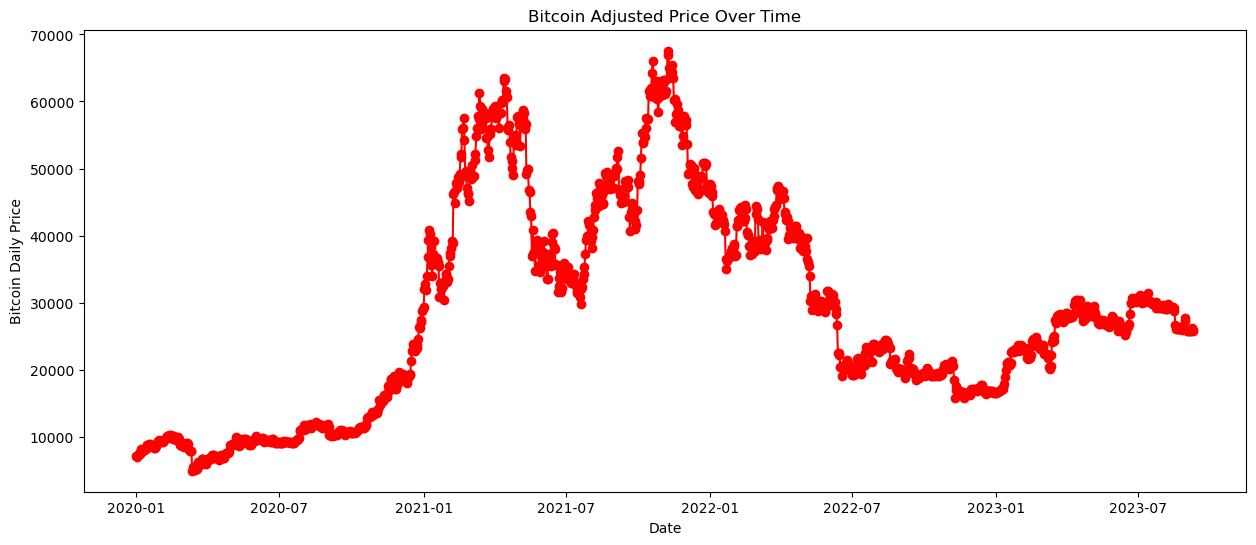

In [14]:
plt.figure(figsize=(15, 6))
plt.plot(btc.index, btc['Bitcoin Price'], marker='o', linestyle='-', color='r')
plt.title('Bitcoin Adjusted Price Over Time')
plt.xlabel('Date')
plt.ylabel('Bitcoin Daily Price')


<Axes: xlabel='Date'>

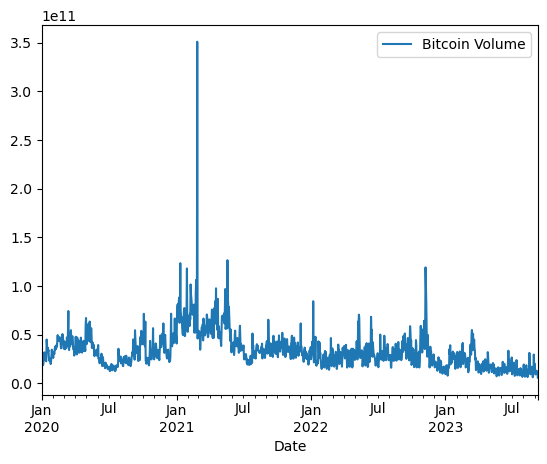

In [15]:
btc.plot(kind="line",y="Bitcoin Volume")

<Axes: xlabel='Date'>

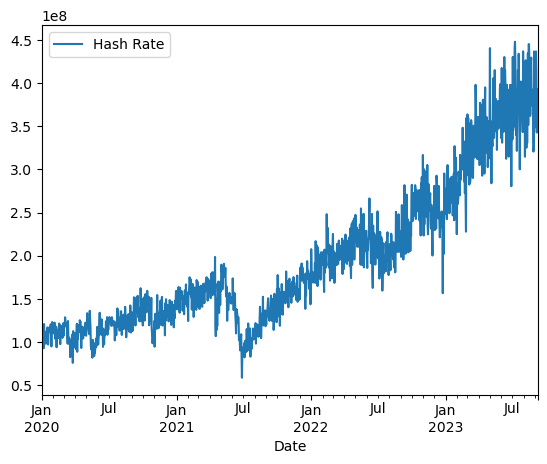

In [16]:
hash_rate.plot(kind="line",y="Hash Rate")

<Axes: xlabel='Date'>

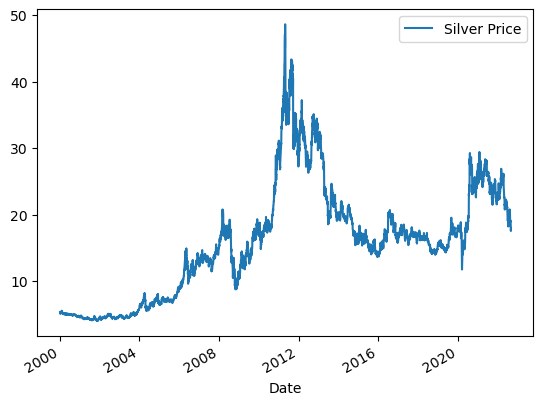

In [17]:
silver.plot(kind="line",y="Silver Price")

In [18]:
btc_data=btc.merge(hash_rate, left_index=True, right_index=True)
final_btc=btc_data.merge(silver, left_index=True, right_index=True)
final_btc.drop("Currency",axis=1,inplace=True)

In [19]:
final_btc.head()

,Bitcoin Price,Bitcoin Volume,Hash Rate,Silver Price
Date,,,,
2020-01-02,6985.470215,20802083465,9.671772e+07,18.046
2020-01-03,7344.884277,28111481032,1.159241e+08,18.151
2020-01-06,7769.219238,23276261598,9.260207e+07,18.179
2020-01-07,8163.692383,28767291327,1.207257e+08,18.393
2020-01-08,8079.862793,31672559265,9.740366e+07,18.167


In [20]:
final_btc=np.log(final_btc)
final_btc.head()

,Bitcoin Price,Bitcoin Volume,Hash Rate,Silver Price
Date,,,,
2020-01-02,8.851588,23.758319,18.387307,2.892924
2020-01-03,8.901759,24.059444,18.568446,2.898726
2020-01-06,8.957925,23.870700,18.343822,2.900267
2020-01-07,9.007452,24.082505,18.609031,2.911970
2020-01-08,8.997130,24.178717,18.394374,2.899607


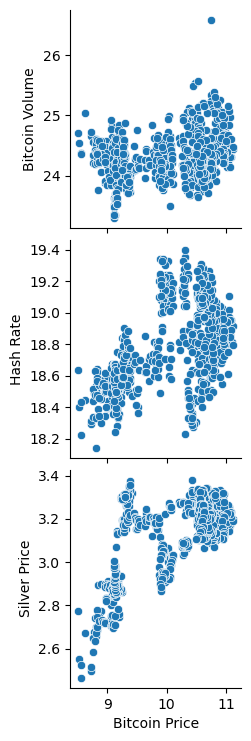

In [21]:
sns.pairplot(final_btc,
            y_vars=["Bitcoin Volume","Hash Rate", "Silver Price"],
            x_vars=["Bitcoin Price"],
            diag_kind="scatter")

<Axes: >

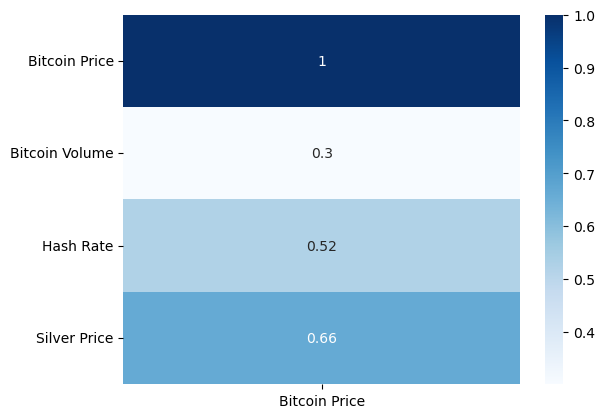

In [22]:
sns.heatmap(data=final_btc.corr()[["Bitcoin Price"]], annot=True, cmap='Blues')

# Create Multiple Linear Regression Model:


In [23]:
x_train, x_test, y_train, y_test = train_test_split(final_btc[["Bitcoin Volume","Hash Rate","Silver Price"]],final_btc["Bitcoin Price"], test_size=.30)

In [24]:
btc_model=LinearRegression()
btc_model.fit(x_train,y_train)

LinearRegression()

In [25]:
# score the testing data
btc_model.score(x_test,y_test)

0.56241527506824

In [26]:
# make the predictions

predicted_prices=btc_model.predict(x_test)
predicted_prices

predicted=pd.DataFrame(predicted_prices,columns=["Predicted Price"])
predicted


,Predicted Price
0,10.661728
1,9.710394
2,10.563019
3,10.381341
4,10.443710
...,...
199,9.383598
200,10.061504
201,10.331191
202,10.070969


In [27]:
# Join Predictions with actual prices

final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head()


,Predicted Price,Bitcoin Volume,Hash Rate,Silver Price,Bitcoin Price
0,10.661728,25.069759,18.795445,3.240872,10.404437
1,9.710394,23.674046,18.391279,3.263467,10.395192
2,10.563019,24.291692,18.851192,3.313349,10.576656
3,10.381341,24.002130,19.042837,3.178762,10.576795
4,10.443710,24.681100,18.744421,3.237148,10.790579


In [28]:
final["Residuals"]=abs(final["Predicted Price"]-final["Bitcoin Price"])
final

,Predicted Price,Bitcoin Volume,Hash Rate,Silver Price,Bitcoin Price,Residuals
0,10.661728,25.069759,18.795445,3.240872,10.404437,0.257290
1,9.710394,23.674046,18.391279,3.263467,10.395192,0.684798
2,10.563019,24.291692,18.851192,3.313349,10.576656,0.013637
3,10.381341,24.002130,19.042837,3.178762,10.576795,0.195454
4,10.443710,24.681100,18.744421,3.237148,10.790579,0.346870
...,...,...,...,...,...,...
199,9.383598,24.711886,18.637809,2.772901,8.511334,0.872264
200,10.061504,24.156609,18.801707,3.122101,10.651022,0.589518
201,10.331191,23.988092,19.174583,3.086852,10.299050,0.032141
202,10.070969,24.063569,18.472419,3.320240,9.413641,0.657329


In [29]:
final_df=np.exp(final)
final_df

,Predicted Price,Bitcoin Volume,Hash Rate,Silver Price,Bitcoin Price,Residuals
0,42690.336124,7.720727e+10,1.454648e+08,25.556,33005.761719,1.293421
1,16488.100849,1.912086e+10,9.710262e+07,26.140,32702.025391,1.983371
2,38677.706495,3.546075e+10,1.538044e+08,27.477,39208.765625,1.013730
3,32252.173736,2.654560e+10,1.862941e+08,24.017,39214.218750,1.215863
4,34327.767910,5.234382e+10,1.382288e+08,25.461,48561.167969,1.414632
...,...,...,...,...,...,...
199,11891.723983,5.398036e+10,1.242504e+08,16.005,4970.788086,2.392322
200,23423.698998,3.098003e+10,1.463786e+08,22.694,42235.730469,1.803120
201,30674.621000,2.617555e+10,2.125278e+08,21.908,29704.390625,1.032663
202,23646.476098,2.822769e+10,1.053100e+08,27.667,12254.402344,1.929631


In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Calculating Mean Absolute Error
mae = mean_absolute_error(final_df['Bitcoin Price'], final_df['Predicted Price'])
print("The Mean Absolute Error is: ", mae)

#Calculating Mean Sqaure Error
mse = mean_squared_error(final_df['Bitcoin Price'], final_df['Predicted Price'])
print("The Mean Sqaured Error is: ", mse)

The Mean Absolute Error is:  10465.974023248142
The Mean Sqaured Error is:  183959485.77257836


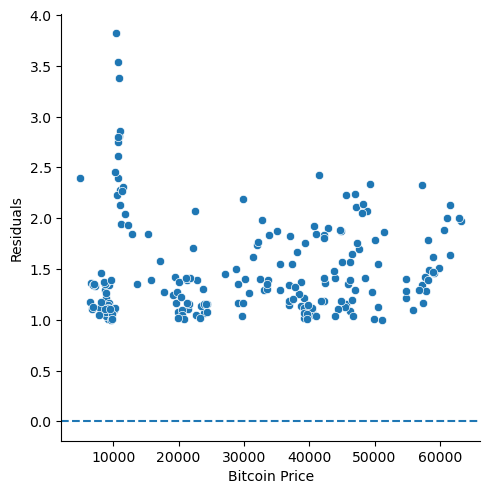

In [31]:
g = sns.relplot(data=final_df, x='Bitcoin Price', y='Residuals')
for ax in g.axes.flat: ax.axhline(0, ls='--')



In [32]:
len([1,2,3,4,5])

5

In [34]:
print(range(len([1,2,3,4,5])))

range(0, 5)


In [35]:
def Tester(arr):
    for i in range(len(arr) - 1):
        if arr[i] == 2 and arr[i + 1] == 2:
            return True
    return False

# Example usage:
my_array = [1, 2, 3, 2, 4, 5]
result = Tester(my_array)

print(result)

False


In [36]:
Tester([1,2,2,3,4])

True